# ==================== FEATURE ENGINEERING ====================

In [1]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)
# pd.options.mode.chained_assignment = None  # default='warn'

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns
sns.set_style('darkgrid')

###### import the cleaned dataset that we created in the previous module

In [2]:
df = pd.read_csv('D:\KOMAL LEARNING\ELITE DATA SCIENCE\ML ORIGINAL\PROJECT 2\Project 2 Workbook Bundle\project_files\MyData\cleaned_df.csv')
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,Missing,0.0,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,Missing,0.0,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,Missing,0.0,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,Missing,0.0,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002


# I. Leverage Domain Knowledge

###### Creating Indicator variables to isolate a property type

let's say that homes with 2 bedrooms and 2 bathrooms are especially popular for investors. Maybe you suspect these types of properties command premium prices.
Sure, the number of bedrooms and the number of bathrooms are both existing features in your dataset. However, they do not specifically isolate this property type. 

In [3]:
df['two_and_two'] = ((df.beds == 2) & (df.baths == 2)).astype(int)

###### Mean of an Indicator Variable

>Benefit from indicator variables is the ability to quickly check the proportion of our observations that meet the condition

In [4]:
print( df.two_and_two.mean() )

0.09458023379383634


>Almost 9.5% of the transactions in our dataset were for properties with 2 beds and 2 baths.

###### Housing Market Recession

>Because we're modeling housing prices in the United States, it's important to consider the housing market recession. According to data from Zillow, the lowest housing prices were from 2010 to end of 2013 (country-wide).

In [5]:
# Create indicator feature for transactions between 2010 and 2013, inclusive
df['during_recession'] = ((df.tx_year >= 2010) & (df.tx_year <= 2013)).astype(int)
# df.tx_year.between(2010, 2013).astype(int)

In [6]:
# Print percent of transactions where during_recession == 1
print( df.during_recession.mean() )

0.2635494155154091


In [7]:
# Set variable a as the earlier indicator variable (combining two masks)
a = ((df.tx_year >= 2010) & (df.tx_year <= 2013)).astype(int)

# Set variable b as the new indicator variable (using "between")
b = df.tx_year.between(2010, 2013).astype(int)

# Are a and b equivalent?
print( all(a == b) )

True


# II. Create Interaction Features

>Interaction features are operations between two or more other features.

### >>>Creating interaction feature : property_age

###### age of the property at the time of the transaction

In [8]:
# Create a property age feature
df['property_age'] = df.tx_year - df.year_built

###### Sanity check post feature creation

In [9]:
# Should not be less than 0
print( df.property_age.min())

-8


>Ok, something's going on... let's investigate.

###### print the number of observations with 'property_age' less than 0.

In [10]:
sum(df.property_age<0)

19

>It's possible that some homeowners bought houses before the construction company built them. This is reasonable, especially with single-family homes. However, for our original problem, we are only interested in houses that already exist because our client only buys existing ones.

###### Remove observations where 'property_age' is less than 0.

In [18]:
df = df[df.property_age >= 0]

print( len(df) )

1863


###### Sanity check

In [19]:
sum(df.property_age<0)

0

### >>>Creating interaction feature : School Score

>Well, we do know the number of schools nearby ('num_schools')

>We also have their median quality score ('median_schools')

>But what if it's the interaction of those two factors that's really important?

>In other words, what if it's good to have many school options, but only if they are good?

In [20]:
df['school_score'] = df.num_schools * df.median_school

In [21]:
df.school_score.median()

18.0

##### What's the range of school scores in our dataset?

In [22]:
df.school_score.describe()

count    1863.000000
mean       17.982823
std         6.465535
min         3.000000
25%        12.000000
50%        18.000000
75%        24.000000
max        30.000000
Name: school_score, dtype: float64

# III. Group Sparse Classes

###### Sparse classes are classes in categorical features that have very few total observations.

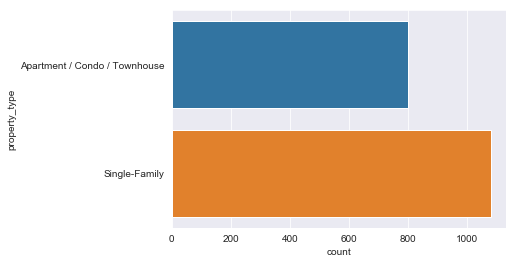

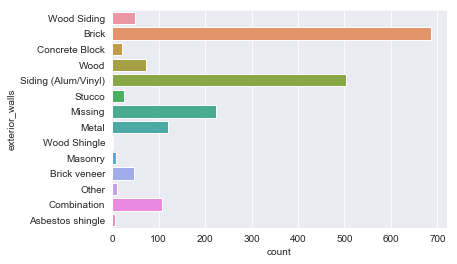

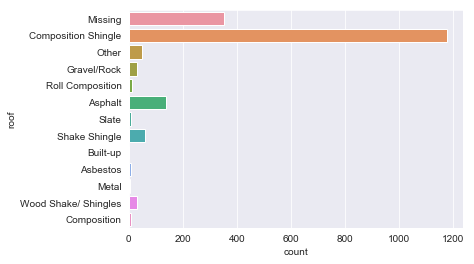

In [14]:
for feature in df.dtypes[df.dtypes == 'object'].index:
    sns.countplot(y=feature,data=df)
    plt.show()

##### df.exterior_walls

To begin, we can start by grouping classes that are similar.

In [15]:
# Group 'Wood Siding' and 'Wood Shingle' with 'Wood'
df.exterior_walls.replace(['Wood Siding', 'Wood Shingle'], 'Wood', inplace=True)

In [16]:
other_exterior_walls = ['Concrete Block', 'Stucco', 'Masonry', 'Other', 'Asbestos shingle']

df.exterior_walls.replace(other_exterior_walls, 'Other', inplace=True)

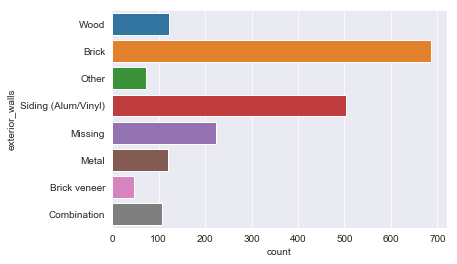

In [17]:
# Bar plot for exterior_walls
sns.countplot(y='exterior_walls', data=df)
plt.show()

##### >>As a rule of thumb, we recommend combining classes until the each one has at least around 50 observations.

##### df.roof

In [23]:
df.roof.replace(['Composition', 'Wood Shake/ Shingles'],'Composition Shingle', inplace=True)

In [24]:
other_roofs = ['Other', 'Gravel/Rock', 'Roll Composition', 'Slate', 'Built-up', 'Asbestos', 'Metal']
df.roof.replace(other_roofs, 'Other', inplace=True)

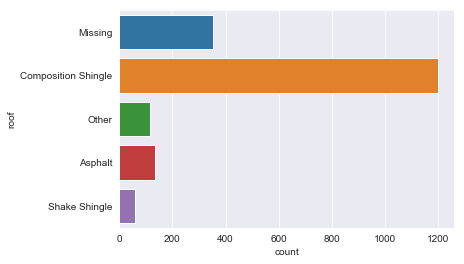

In [25]:
sns.countplot(y='roof', data=df)
plt.show()

# IV. Prepare Analytical Base Table

>Before we move on, we'll need to finalize the table to use for modeling. 

>In other words, this is the table that has already been cleaned and augmented through feature engineering, and we'll be performing our analyses or building our models on it. Therefore, we'll call it the analytical base table (ABT).

### Dummy Variables

>Python machine learning algorithms cannot handle categorical features directly. Specifically, they cannot handle text data. Therefore, we need to create what are called dummy variables for our categorical features.

>Dummy variables are binary (0 or 1) features that each represent a single class from a categorical feature.

>Pandas has an incredibly easy function for doing this automatically.It's called pd.get_dummies().

In [27]:
abt = pd.get_dummies(df, columns=['exterior_walls', 'roof', 'property_type'])

In [28]:
abt.columns

Index(['tx_price', 'beds', 'baths', 'sqft', 'year_built', 'lot_size',
       'basement', 'restaurants', 'groceries', 'nightlife', 'cafes',
       'shopping', 'arts_entertainment', 'beauty_spas', 'active_life',
       'median_age', 'married', 'college_grad', 'property_tax', 'insurance',
       'median_school', 'num_schools', 'tx_year', 'two_and_two',
       'during_recession', 'property_age', 'school_score',
       'exterior_walls_Brick', 'exterior_walls_Brick veneer',
       'exterior_walls_Combination', 'exterior_walls_Metal',
       'exterior_walls_Missing', 'exterior_walls_Other',
       'exterior_walls_Siding (Alum/Vinyl)', 'exterior_walls_Wood',
       'roof_Asphalt', 'roof_Composition Shingle', 'roof_Missing',
       'roof_Other', 'roof_Shake Shingle',
       'property_type_Apartment / Condo / Townhouse',
       'property_type_Single-Family'],
      dtype='object')

### Removing redundant features

>Redundant features would typically be those that have been replaced by other features that you've added

##### remove 'tx_year' and 'year_built'

In [29]:
abt.drop(['tx_year', 'year_built'], axis=1, inplace=True)

In [30]:
abt.columns

Index(['tx_price', 'beds', 'baths', 'sqft', 'lot_size', 'basement',
       'restaurants', 'groceries', 'nightlife', 'cafes', 'shopping',
       'arts_entertainment', 'beauty_spas', 'active_life', 'median_age',
       'married', 'college_grad', 'property_tax', 'insurance', 'median_school',
       'num_schools', 'two_and_two', 'during_recession', 'property_age',
       'school_score', 'exterior_walls_Brick', 'exterior_walls_Brick veneer',
       'exterior_walls_Combination', 'exterior_walls_Metal',
       'exterior_walls_Missing', 'exterior_walls_Other',
       'exterior_walls_Siding (Alum/Vinyl)', 'exterior_walls_Wood',
       'roof_Asphalt', 'roof_Composition Shingle', 'roof_Missing',
       'roof_Other', 'roof_Shake Shingle',
       'property_type_Apartment / Condo / Townhouse',
       'property_type_Single-Family'],
      dtype='object')

In [32]:
abt.to_csv('D:\\KOMAL LEARNING\\ELITE DATA SCIENCE\\ML ORIGINAL\\PROJECT 2\\Project 2 Workbook Bundle\\project_files\\MyData\\analytical_base_table.csv', index=None)